In [1]:
# Simulação Epidemiológica SIR com Autômatos Celulares

## Importação das Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap
from IPython.display import HTML

In [2]:
## Definição dos Parâmetros da Simulação
grid_size = 50  # Tamanho da grade
P_infection = 0.3  # Probabilidade de infecção
T_recovery = 5  # Tempo médio de recuperação
initial_infected = 5  # Número inicial de infectados
simulation_steps = 100  # Número de passos da simulação

In [3]:
## Definição dos Estados das Células
SUSCEPTIBLE = 0
INFECTED = 1
RECOVERED = 2

In [4]:
## Inicialização da Grade
grid = np.zeros((grid_size, grid_size), dtype=int)

# Infectando algumas células aleatoriamente
for _ in range(initial_infected):
    x, y = np.random.randint(0, grid_size, size=2)
    grid[x, y] = INFECTED

# Dicionário para armazenar tempo de infecção
time_infected = np.zeros((grid_size, grid_size), dtype=int)

In [5]:
##  Função para Atualizar a Simulação
def update(frame):
    global grid, time_infected
    new_grid = grid.copy()

    # Contadores para estatísticas
    susceptible_count = 0
    infected_count = 0
    recovered_count = 0

    for x in range(grid_size):
        for y in range(grid_size):
            if grid[x, y] == SUSCEPTIBLE:
                susceptible_count += 1
            elif grid[x, y] == INFECTED:
                infected_count += 1
            elif grid[x, y] == RECOVERED:
                recovered_count += 1

            if grid[x, y] == INFECTED:
                # Conta tempo de infecção
                time_infected[x, y] += 1
                if time_infected[x, y] >= T_recovery:
                    new_grid[x, y] = RECOVERED

                # Espalha infecção para vizinhos na Vizinhança de Moore (8 vizinhos)
                for dx in [-1, 0, 1]:
                    for dy in [-1, 0, 1]:
                        if (dx != 0 or dy != 0) and 0 <= x+dx < grid_size and 0 <= y+dy < grid_size:
                            if grid[x+dx, y+dy] == SUSCEPTIBLE and np.random.rand() < P_infection:
                                new_grid[x+dx, y+dy] = INFECTED

    grid[:] = new_grid
    im.set_data(grid)

    # Atualiza estatísticas no título
    ax.set_title(f"Passo: {frame+1} | Suscetíveis: {susceptible_count}, Infectados: {infected_count}, Recuperados: {recovered_count}")

    return im,

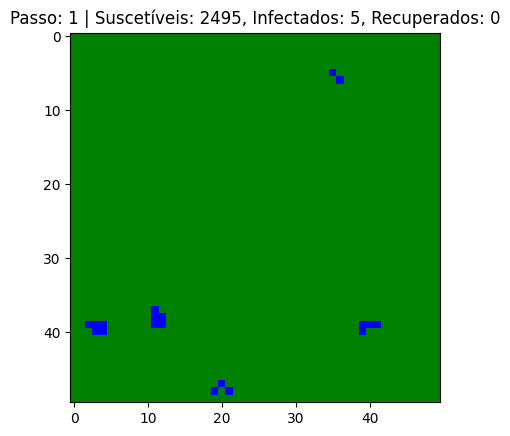

In [6]:
## Configuração da Animação
fig, ax = plt.subplots()
cmap = ListedColormap(['green', 'red', 'blue'])  # Cores para SUSCEPTIBLE, INFECTED, RECOVERED
im = ax.imshow(grid, cmap=cmap, interpolation='nearest')
ani = animation.FuncAnimation(fig, update, frames=simulation_steps, interval=200, repeat=False)

In [7]:
## 7️⃣ Exibir a Simulação no Jupyter Notebook
HTML(ani.to_jshtml())

In [8]:
## 8️⃣ Salvar a Animação como Vídeo (opcional)
ani.save("simulacao_epidemiologica2.mp4", writer="ffmpeg")